# Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama 



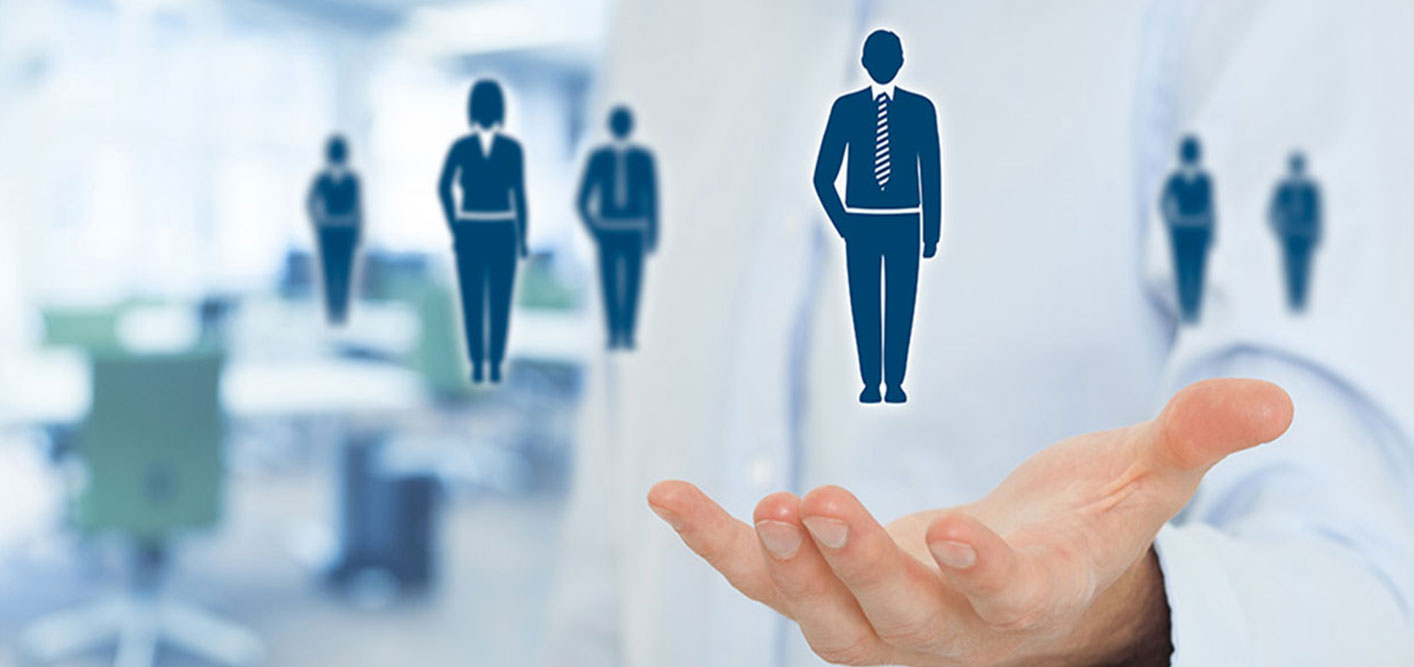




### Bir oyun şirketi müşterilerinin bazı özelliklerini kullanarak seviye tabanlı(levelbased) yeni müşteri tanımları(persona) oluşturmak ve bu yeni müşteri tanımlarına göre segmentler oluşturup bu segmentlere göre yeni gelebilecek müşterilerin şirkete ortalama ne kadar kazandırabileceğini tahmin etmek istemektedir.
### Örnek vermek gerekirse ; Türkiye’den IOS kullanıcısı olan 25 yaşındaki bir erkek kullanıcının ortalama ne kadar kazandırabileceği belirlenmek isteniyor.




### Veri setinin hikayesine bakacak olursak , Persona.csv veri seti uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu ürünleri satın alan kullanıcıların bazı demografik bilgilerini barındırmaktadır. Veri seti her satış işleminde oluşan kayıtlardan meydana gelmektedir. Bunun anlamı tablo tekilleştirilmemiştir. Diğer bir ifade ile belirli demografik özelliklere sahip bir kullanıcı birden fazla alışveriş yapmış olabilir.



#### PRICE – Müşterinin harcama tutarı 
#### SOURCE – Müşterinin bağlandığı cihaz türü
#### SEX – Müşterinin cinsiyeti
#### COUNTRY – Müşterinin ülkesi
#### AGE – Müşterinin yaşı

















Veriye hızlı bakışlar atalım ; 

In [99]:
import pandas as pd
import numpy as np

In [100]:
df1 = pd.read_csv("persona.csv")
df = df1.copy()

In [101]:
def uniqsay(dataframe):
    for col in dataframe:
        df[col].unique()
        print(f'sayılan:{col}')
        print(df[col].unique())
        
        
def nuniqsayma(dataframe):
    for col in dataframe:
        df[col].nunique()
        print(f'sayılan:{col}')
        print(df[col].nunique())
        

def Verincele(dataframe):
    print("******head******")
    print(dataframe.head(5))
    print("******shape******")
    print(dataframe.shape)
    print("******info********")
    print(dataframe.info())
    print("******describe********")
    print(dataframe.describe())
    


In [102]:
Verincele(df)

******head******
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
******shape******
(5000, 5)
******info********
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
PRICE      5000 non-null int64
SOURCE     5000 non-null object
SEX        5000 non-null object
COUNTRY    5000 non-null object
AGE        5000 non-null int64
dtypes: int64(2), object(3)
memory usage: 234.4+ KB
None
******describe********
             PRICE          AGE
count  5000.000000  5000.000000
mean     34.132000    23.581400
std      12.464897     8.995908
min       9.000000    15.000000
25%      29.000000    17.000000
50%      39.000000    21.000000
75%      39.000000    27.000000
max      59.000000    66.000000


In [103]:
uniqsay(df)

sayılan:PRICE
[39 49 29 19 59  9]
sayılan:SOURCE
['android' 'ios']
sayılan:SEX
['male' 'female']
sayılan:COUNTRY
['bra' 'tur' 'usa' 'can' 'deu' 'fra']
sayılan:AGE
[17 26 23 15 19 21 16 35 42 40 49 34 18 32 25 30 20 22 50 37 24 31 28 66
 27 47 57 52 39 59 46 36 29 51 55 53 33 43 38 56 54 41 44 45 65 61]


In [104]:
nuniqsayma(df)

sayılan:PRICE
6
sayılan:SOURCE
2
sayılan:SEX
2
sayılan:COUNTRY
6
sayılan:AGE
46


In [105]:
# Hangi ülkeden kaçar tane satış olmuş?
df.pivot_table("PRICE","COUNTRY")

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


In [106]:
# Ülkelere göre satışlardan toplam ne kadar kazanılmış?
df.groupby("COUNTRY").agg({"PRICE":["sum"]})

,PRICE
,sum
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [107]:
# SOURCE türlerine göre satış sayıları nedir?
df.groupby(['SOURCE'])[['PRICE']].agg('count')

,PRICE
SOURCE,
android,2974
ios,2026


In [108]:
# Ülkelere göre PRICE ortalamaları ve toplamları nedir?
df.groupby("COUNTRY").agg({"PRICE":["mean","sum"]})

PRICE       
              mean    sum
COUNTRY                  
bra      34.327540  51354
can      33.608696   7730
deu      34.032967  15485
fra      33.587459  10177
tur      34.787140  15689
usa      34.007264  70225

In [109]:
# SOURCE'laragöre PRICE ortalamaları nedir?
df.groupby(["SOURCE"]).agg({"PRICE":["mean"]})

,PRICE
,mean
SOURCE,
android,34.174849
ios,34.069102


In [110]:
# COUNTRY-SOURCE kırılımında PRICE ortalamaları nedir?
df.groupby(["SOURCE","COUNTRY"]).agg({"PRICE":["mean","sum"]})

PRICE       
                      mean    sum
SOURCE  COUNTRY                  
android bra      34.387029  32874
        can      33.330709   4233
        deu      33.869888   9111
        fra      34.312500   5490
        tur      36.229437   8369
        usa      33.760357  41559
ios     bra      34.222222  18480
        can      33.951456   3497
        deu      34.268817   6374
        fra      32.776224   4687
        tur      33.272727   7320
        usa      34.371703  28666

In [111]:
# COUNTRY, SOURCE, SEX, AGE kırılımında ortalama kazançlar nedir? 
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":["mean"]})

PRICE
                                 mean
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

In [112]:
#  Çıktıyı PRICE’a göre sıralarsak ; 
agg_df = df.groupby([x for x in df.columns[df.columns != 'PRICE']]).mean()
agg_df.sort_values(by = ['PRICE'],ascending = False, inplace = True)
agg_df

PRICE
SOURCE  SEX    COUNTRY AGE       
android female fra     24    59.0
        male   usa     36    59.0
               bra     46    59.0
ios     male   usa     32    54.0
android female deu     36    49.0
...                           ...
        male   tur     21    19.0
ios     female usa     38    19.0
        male   bra     47    19.0
               tur     47    19.0
android male   deu     26     9.0

[348 rows x 1 columns]

In [113]:
#  Indekste yer alan isimleri değişken ismine çevirelim 
agg_df.reset_index(inplace=True)

In [114]:
# Age değişkenini kategorik değişkene çevirerek ve agg_df’e ekleyelim
agg_df["AGE_CAT"] = pd.cut(x = agg_df["AGE"],bins=[0, 18, 23, 30, 40, 70],
                           labels=['0_18', '19_23','24_30','31_40','41_70'])

agg_df

,SOURCE,SEX,COUNTRY,AGE,PRICE,AGE_CAT
0,android,female,fra,24,59.0,24_30
1,android,male,usa,36,59.0,31_40
2,android,male,bra,46,59.0,41_70
3,ios,male,usa,32,54.0,31_40
4,android,female,deu,36,49.0,31_40
...,...,...,...,...,...,...
343,android,male,tur,21,19.0,19_23
344,ios,female,usa,38,19.0,31_40
345,ios,male,bra,47,19.0,41_70
346,ios,male,tur,47,19.0,41_70


In [115]:
# Yeni seviye tabanlı müşterileri (persona) tanımlayalım 
agg_df["customers_level_based"] = ['_'.join(i).upper() for i in agg_df.drop(["AGE", "PRICE"],
                                                                            axis=1).values]

In [116]:
agg_df.head()

,SOURCE,SEX,COUNTRY,AGE,PRICE,AGE_CAT,customers_level_based
0,android,female,fra,24,59.0,24_30,ANDROID_FEMALE_FRA_24_30
1,android,male,usa,36,59.0,31_40,ANDROID_MALE_USA_31_40
2,android,male,bra,46,59.0,41_70,ANDROID_MALE_BRA_41_70
3,ios,male,usa,32,54.0,31_40,IOS_MALE_USA_31_40
4,android,female,deu,36,49.0,31_40,ANDROID_FEMALE_DEU_31_40


In [117]:
#  Yeni müşterileri (personaları) segmentlere ayıralım. 
agg_df["SEGMENT"] = pd.cut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"])

In [118]:
agg_df.reset_index(inplace = True)
agg_df

,index,SOURCE,SEX,COUNTRY,AGE,PRICE,AGE_CAT,customers_level_based,SEGMENT
0,0,android,female,fra,24,59.0,24_30,ANDROID_FEMALE_FRA_24_30,A
1,1,android,male,usa,36,59.0,31_40,ANDROID_MALE_USA_31_40,A
2,2,android,male,bra,46,59.0,41_70,ANDROID_MALE_BRA_41_70,A
3,3,ios,male,usa,32,54.0,31_40,IOS_MALE_USA_31_40,A
4,4,android,female,deu,36,49.0,31_40,ANDROID_FEMALE_DEU_31_40,A
...,...,...,...,...,...,...,...,...,...
343,343,android,male,tur,21,19.0,19_23,ANDROID_MALE_TUR_19_23,D
344,344,ios,female,usa,38,19.0,31_40,IOS_FEMALE_USA_31_40,D
345,345,ios,male,bra,47,19.0,41_70,IOS_MALE_BRA_41_70,D
346,346,ios,male,tur,47,19.0,41_70,IOS_MALE_TUR_41_70,D


In [119]:
agg_df.groupby(["SEGMENT"]).agg({"PRICE":["mean","max","sum"]})

PRICE                   
              mean   max          sum
SEGMENT                              
D        18.250000  21.5   182.500000
C        30.938913  34.0  5321.493015
B        37.683327  46.5  5916.282369
A        52.888889  59.0   476.000000

In [120]:
# Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini  tahmin edelim
# 33 yaşında ANDROID kullanan bir Türk kadını hangi segmenteaittir ve ortalama ne kadar gelir kazandırması beklenir?
new_user = "ANDROID_FEMALE_TUR_31_40"

agg_df[agg_df["customers_level_based"] == new_user]

,index,SOURCE,SEX,COUNTRY,AGE,PRICE,AGE_CAT,customers_level_based,SEGMENT
18,18,android,female,tur,32,43.000000,31_40,ANDROID_FEMALE_TUR_31_40,B
33,33,android,female,tur,31,40.666667,31_40,ANDROID_FEMALE_TUR_31_40,B


In [121]:
# 35 yaşında IOS kullanan bir Fransız kadını hangi segmenteaittir ve ortalama ne kadar gelir kazandırması beklenir? 
new_user1 = "IOS_FEMALE_FRA_31_40"

agg_df[agg_df["customers_level_based"] == new_user1]

,index,SOURCE,SEX,COUNTRY,AGE,PRICE,AGE_CAT,customers_level_based,SEGMENT
208,208,ios,female,fra,40,33.000000,31_40,IOS_FEMALE_FRA_31_40,C
224,224,ios,female,fra,31,32.636364,31_40,IOS_FEMALE_FRA_31_40,C
